## Ide feature extraction

1. floors_before_eq (total) -> Structured parse pake LLM
2. old_building -> standarisasi?
3. plinth_area -> Structured parse pake LLM
4. height_before_eq -> standarisasi
5. land_surface_condition -> OHE
6. type_of_foundation -> OHE
7. type_of_roof -> OHE
8. type_of_ground_floor -> OHE
9. type_of_other_floor -> OHE
10. position -> OHE
11. building_plan_configuration -> OHE
12. technical_solution_proposed -> OHE (aku ga ngerti apa ada pengaruhnya fitur ini dengan damage_grade)
13. legal_ownership_status -> benerin dulu, LE
14. has_secondary_use -> 
15. type_of_reinforcement_concrete -> OHE
16. residential_type -> OHE
17. no_family_residing -> OHE (aku ga ngerti apa ada pengaruhnya fitur ini dengan damage_grade)
18. public_place_type -> OHE
19. industrial_use_type -> OHE
20. govermental_use_type -> OHE
21. flexible_superstructure -> OHE
22. wall_binding -> OHE
23. wall_material -> OHE
24. damage_grade -> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI

warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("../../dataset/raw/train.csv", )
train.drop(["Unnamed: 0"], axis=1, inplace=True)
train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,floor two,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,Floor 3,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,Two Floor,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,two,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,just 2 floor,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [3]:
# Gajadi
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_KEY")

class FloorB4Eq(BaseModel):
    floor: int = Field(description="Number of floor of the building")

parser = PydanticOutputParser(pydantic_object=FloorB4Eq)

model_name = 'gpt-3.5-turbo'
temperature = 0.0
model = OpenAI(model_name=model_name, temperature=temperature,
               openai_api_key=OPENAI_API_KEY)


prompt = PromptTemplate(
    template="{format_instructions}\nNumber of floor in given context:\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()}
)


def floor_from_context(context):
    if context is "" or None:
        return np.nan
    else:
        _input = prompt.format_prompt(query=context)
        output = model(_input.to_string())
        return parser.parse(output).floor


In [5]:
print(train.shape)
train.dropna(inplace=True)
print(train.shape)

(722815, 24)
(46801, 24)


In [6]:
train.reset_index(inplace=True)
train.drop(["index"], axis=1, inplace=True)

In [7]:
train.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,Has 1 floor,22.0,300 ft^2,10.0,Moderate slope,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,Three floor,22.0,360 ft^2,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,Floor 2,8.0,380 ft^2,17.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,two,22.0,250 ft^2,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,Floor two,7.0,312 ft^2,13.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46801 entries, 0 to 46800
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   floors_before_eq (total)        46801 non-null  object 
 1   old_building                    46801 non-null  float64
 2   plinth_area (ft^2)              46801 non-null  object 
 3   height_before_eq (ft)           46801 non-null  float64
 4   land_surface_condition          46801 non-null  object 
 5   type_of_foundation              46801 non-null  object 
 6   type_of_roof                    46801 non-null  object 
 7   type_of_ground_floor            46801 non-null  object 
 8   type_of_other_floor             46801 non-null  object 
 9   position                        46801 non-null  object 
 10  building_plan_configuration     46801 non-null  object 
 11  technical_solution_proposed     46801 non-null  object 
 12  legal_ownership_status          

## Clean

In [9]:
train_cp = train.copy()
angka = {
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "1st": 1,
    "2nd": 2,
    "3rd": 3,
    "fifth": 5,
    "second": 2,
    "third": 3,
    "3.00": 3,
}

delete = {
    "story": "",
    "stories": "",
    "floor": "",
    "floors": "",
    "has": "",
    "there is": "",
    "just": "",
    "-": "",
    "fl": "",
    "/": "",
}

train_cp["floors_before_eq (total)"] = train_cp["floors_before_eq (total)"]\
                                            .str.lower()\
                                            .replace(delete, regex=True)\
                                            .str.strip()\
                                            .replace(angka, regex=True)

train_cp["floors_before_eq (total)"] = train_cp["floors_before_eq (total)"].astype(
    "float")
train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300 ft^2,10.0,Moderate slope,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360 ft^2,18.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380 ft^2,17.0,Flat,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250 ft^2,14.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312 ft^2,13.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [10]:
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].str.lower()
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].apply(
    lambda x: x.replace(" ft^2", ""))
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].apply(
    lambda x: x.replace("more than ", ""))
train_cp["plinth_area (ft^2)"] = train_cp["plinth_area (ft^2)"].astype("float")


In [12]:
type_of_foundation_dict = {
    # "Mud mortar-Stone/Brick": "Clay mortar-Stone/Brick",
    "Bamboo/TImber": "Bamboo or Timber",
    "Bamboo/Timber": "Bamboo or Timber",
    "RC": "Reinforced Concrete",
    "Others": "Other",
    "Cement-Stone or Cement-Brick": "Cement-Stone/Brick"
}

train_cp["type_of_foundation"] = train_cp["type_of_foundation"]\
                                    .replace(type_of_foundation_dict)\
                                    .str.strip()

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300.0,10.0,1,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360.0,18.0,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380.0,17.0,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250.0,14.0,2,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312.0,13.0,2,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [13]:
type_of_roof_dict = {
    "Bamboo/TImber-Heavy Roof": "Bamboo/Timber Heavy roof",
    "Bamboo/TImber-Light Roof": "Bamboo or Timber Light roof",
    "Bamboo/Timber Light roof": "Bamboo or Timber Light roof ",
    "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
    "Reinforced brick concrete/rcc/rbc": "rcc/rb/rbc",
    "Bamboo or Timber Heavy roof": "Bamboo/Timber Heavy roof",
    "Reinforced Brick Slab/rcc/rbc": "rcc/rb/rbc",
}

train_cp["type_of_roof"] = train_cp["type_of_roof"].replace(type_of_roof_dict).str.strip()

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300.0,10.0,1,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360.0,18.0,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380.0,17.0,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Brick or Stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250.0,14.0,2,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312.0,13.0,2,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [14]:
type_of_ground_floor_dict = {
    "rc": "reinforced concrete",
    "brick/stone": "brick or stone",
    # "lumber": "wood",
    # "timber": "wood",
    # "mud": "clay"
}

train_cp["type_of_ground_floor"] = train_cp["type_of_ground_floor"].str.lower()\
    .replace(type_of_ground_floor_dict)\

train_cp.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,1.0,22.0,300.0,10.0,1,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,mud,Not applicable,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
1,3.0,22.0,360.0,18.0,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
2,2.0,8.0,380.0,17.0,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,brick or stone,Timber-Planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,22.0,250.0,14.0,2,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,None,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
4,2.0,7.0,312.0,13.0,2,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,clay,TImber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0


In [15]:
type_of_other_floor_dict = {
    # "lumber-plank": "wood-plank",
    # "timber-planck": "wood-plank",
    "timber/bamboo-mud": "wood-mud or bamboo mud",
    "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
    "wood or bamboo mud": "wood-mud or bamboo mud",
    "timber mud or bamboo-mud": "wood-mud or bamboo mud"
}

train_cp["type_of_other_floor"] = train_cp["type_of_other_floor"]\
    .str.lower()\
    .replace(type_of_other_floor_dict)

train_cp["type_of_other_floor"].value_counts()


wood-mud or bamboo mud               30033
not applicable                        7197
timber-planck                         3405
lumber-plank                          3028
rcc/rb/rbc                            1917
wood-plank                            1145
reinforced brick concrete/rcc/rbc       76
Name: type_of_other_floor, dtype: int64

In [16]:
train_cp['no_family_residing'] = train_cp['no_family_residing'].replace(
    'None', '0.0').astype('float')

train_cp['no_family_residing'].value_counts()

1.0    39405
0.0     4436
2.0     2545
3.0      316
4.0       76
5.0       16
6.0        4
7.0        2
8.0        1
Name: no_family_residing, dtype: int64

In [17]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46801 entries, 0 to 46800
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   floors_before_eq (total)        46801 non-null  float64
 1   old_building                    46801 non-null  float64
 2   plinth_area (ft^2)              46801 non-null  float64
 3   height_before_eq (ft)           46801 non-null  float64
 4   land_surface_condition          46801 non-null  int64  
 5   type_of_foundation              46801 non-null  object 
 6   type_of_roof                    46801 non-null  object 
 7   type_of_ground_floor            46801 non-null  object 
 8   type_of_other_floor             46801 non-null  object 
 9   position                        46801 non-null  object 
 10  building_plan_configuration     46801 non-null  object 
 11  technical_solution_proposed     46801 non-null  object 
 12  legal_ownership_status          

In [18]:
train_cp["residential_type"] = train_cp["residential_type"].replace({
    "Other Residential Type": "Other"
})

train_cp["residential_type"].value_counts()

Non-residential       44591
Hotel/Motel            1640
Rental Residential      368
Housing                 180
Other                    22
Name: residential_type, dtype: int64

In [19]:
train_cp['govermental_use_type'] = train_cp['govermental_use_type'].replace(
    ['Police Offices'], 'Govermental Buildings')

In [20]:
train_cp["public_place_type"] = train_cp["public_place_type"]\
    .apply(lambda x: "Public" if x != "Non-public" else "Non-public")

In [21]:
legal_ownership_status_dict = {
    "Private": "Private",
    "Private Use": "Private",
    "Prvt": "Private",
    "Privste": "Private",
    "Public Use": "Public",
    "Public Space": "Public",
    "Institutional Use": "Institutional",
    "Institutionals": "Institutional",
    "Unknown": "Other",
    "Unspecified": "Other",
}

train_cp["legal_ownership_status"] = train_cp["legal_ownership_status"].str.strip().replace(legal_ownership_status_dict)
train_cp["legal_ownership_status"].value_counts()

Private          44824
Public            1244
Institutional      490
Other              243
Name: legal_ownership_status, dtype: int64

In [279]:
train_cp["wall_binding"].value_counts()

5.0    37775
0.0     4376
2.0     3406
1.0      722
7.0      507
3.0       15
Name: wall_binding, dtype: int64

In [23]:
train_cp.to_csv("../../dataset/processed/train_cleaned_v2.csv", index=False)

## Encode

In [ ]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46801 entries, 0 to 46800
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   floors_before_eq (total)        46801 non-null  float64
 1   old_building                    46801 non-null  float64
 2   plinth_area (ft^2)              46801 non-null  float64
 3   height_before_eq (ft)           46801 non-null  float64
 4   land_surface_condition          46801 non-null  int64  
 5   type_of_foundation              46801 non-null  object 
 6   type_of_roof                    46801 non-null  object 
 7   type_of_ground_floor            46801 non-null  object 
 8   type_of_other_floor             46801 non-null  object 
 9   position                        46801 non-null  object 
 10  building_plan_configuration     46801 non-null  object 
 11  technical_solution_proposed     46801 non-null  object 
 12  legal_ownership_status          

In [276]:
ordinal_col = ["land_surface_condition", "technical_solution_proposed"]
binary_col = ["flexible_superstructure", "public_place_type", "govermental_use_type", "has_secondary_use"]
numerical_col = ["floors_before_eq (total)", "old_building",
                 "plinth_area (ft^2)", "height_before_eq (ft)"]
target_col = ["damage_grade"]
categorical_col_lt5 = [col for col in train_cp.columns if col not in ordinal_col + binary_col + numerical_col + target_col and train_cp[col].nunique() <= 4] 
cat_col = [col for col in train_cp.columns if col not in ordinal_col + binary_col + numerical_col and train_cp[col].nunique() >= 5]

In [280]:
land_surface_condition_dict = {
    "Steep slope" : 0,
    "Moderate slope": 1,
    "Flat": 2,
}

train_cp["land_surface_condition"] = train_cp["land_surface_condition"].replace(land_surface_condition_dict)

technical_solution_proposed_dict = {
    "Reconstruction": 0,
    "Major repair": 1,
    "Minor repair": 2,
    "No need": 3,
}

train_cp["technical_solution_proposed"] = train_cp["technical_solution_proposed"].replace(technical_solution_proposed_dict)

flexible_superstructure_dict = {
    "unavailable": 0,
    "available": 1,
}

train_cp["flexible_superstructure"] = train_cp["flexible_superstructure"].replace(
    flexible_superstructure_dict)

public_place_type_dict = {
    "Public": 0,
    "Non-public": 1,
}

train_cp["public_place_type"] = train_cp["public_place_type"].replace(
    public_place_type_dict)

governmental_use_type_dict = {
    "Govermental Buildings": 0,
    "Non-govermental": 1,
}

train_cp["govermental_use_type"] = train_cp["govermental_use_type"].replace(
    governmental_use_type_dict)


In [209]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe_df = pd.DataFrame(ohe.fit_transform(train_cp[categorical_col_lt5]))
ohe_df.columns = ohe.get_feature_names(categorical_col_lt5)

train_ohe = train_cp.copy() 
for cat in categorical_col_lt5:
    train_ohe.drop(cat, axis=1, inplace=True)

print(train_ohe.shape)

train_ohe_merge = pd.concat([train_ohe, ohe_df], axis=1)

print(train_ohe_merge.shape)

(46801, 20)
(46801, 36)


In [210]:
# train_ohe_merge["volume_building"] = train_ohe_merge["plinth_area (ft^2)"] * train_ohe_merge["height_before_eq (ft)"]
# train_ohe_merge


In [283]:
from sklearn.preprocessing import RobustScaler

s = RobustScaler()

train_ohe_merge[numerical_col] = s.fit_transform(
    train_ohe_merge[numerical_col])

train_ohe_merge.head()


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,-1.0,0.333333,-0.319149,-1.000000,1,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,mud,not applicable,Not attached,...,0.0,Non-residential,0.0,1,Non-industrial,1,0,5.0,2.0,5.0
1,1.0,0.333333,0.000000,0.333333,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,clay,wood-mud or bamboo mud,Not attached,...,0.0,Non-residential,1.0,1,Non-industrial,1,0,5.0,2.0,4.0
2,0.0,-0.444444,0.106383,0.166667,2,Clay mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,brick or stone,timber-planck,Not attached,...,0.0,Non-residential,1.0,1,Non-industrial,1,0,5.0,2.0,5.0
3,0.0,0.333333,-0.585106,-0.333333,2,Clay mortar-Stone/Brick,Bamboo or Timber Light roof,clay,wood-mud or bamboo mud,Not attached,...,0.0,Non-residential,0.0,1,Non-industrial,1,0,5.0,2.0,5.0
4,0.0,-0.500000,-0.255319,-0.500000,2,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,clay,wood-mud or bamboo mud,Not attached,...,0.0,Non-residential,1.0,1,Non-industrial,1,1,5.0,2.0,2.0


In [285]:
from category_encoders.target_encoder import TargetEncoder
 
enc = TargetEncoder(cols=cat_col, smoothing=10)
enc.fit(train_ohe_merge[cat_col + categorical_col_lt5], train_ohe_merge["damage_grade"])
enc_df = train_ohe_merge.copy()
enc_df[cat_col + categorical_col_lt5] = enc.transform(train_ohe_merge[cat_col + categorical_col_lt5])
enc_df.head()


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,-1.0,0.333333,-0.319149,-1.000000,1,3.921709,3.747907,3.847860,2.981242,Not attached,...,0.0,3.692359,3.372633,1,3.635343,1,0,3.96323,2.0,5.0
1,1.0,0.333333,0.000000,0.333333,2,3.924681,3.806631,3.837207,3.899777,Not attached,...,0.0,3.692359,3.666844,1,3.635343,1,0,3.96323,2.0,4.0
2,0.0,-0.444444,0.106383,0.166667,2,3.924681,3.743924,3.741800,3.725698,Not attached,...,0.0,3.692359,3.666844,1,3.635343,1,0,3.96323,2.0,5.0
3,0.0,0.333333,-0.585106,-0.333333,2,3.924681,3.747907,3.837207,3.899777,Not attached,...,0.0,3.692359,3.372633,1,3.635343,1,0,3.96323,2.0,5.0
4,0.0,-0.500000,-0.255319,-0.500000,2,3.921709,3.747907,3.837207,3.899777,Not attached,...,0.0,3.692359,3.666844,1,3.635343,1,1,3.96323,2.0,2.0


In [286]:
enc_df["damage_grade"] = enc_df["damage_grade"].astype('int')
enc_df["damage_grade"] = enc_df["damage_grade"] - 1
enc_df.to_csv("../../dataset/processed/train_encoded_v3_allTE.csv", index=False)

In [287]:
def clean(df):
    angka = {
        "one": 1,
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "seven": 7,
        "eight": 8,
        "nine": 9,
        "1st": 1,
        "2nd": 2,
        "3rd": 3,
        "fifth": 5,
        "second": 2,
        "third": 3,
        "3.00": 3,
    }

    delete = {
        "story": "",
        "stories": "",
        "floor": "",
        "floors": "",
        "has": "",
        "there is": "",
        "just": "",
        "-": "",
        "fl": "",
        "/": "",
    }

    df["floors_before_eq (total)"] = df["floors_before_eq (total)"]\
        .str.lower()\
        .replace(delete, regex=True)\
        .str.strip()\
        .replace(angka, regex=True)

    df["floors_before_eq (total)"] = df["floors_before_eq (total)"].astype(
        "float")
    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].str.lower()

    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].apply(
        lambda x: x.replace(" ft^2", ""))
    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].apply(
        lambda x: x.replace("more than ", ""))
    df["plinth_area (ft^2)"] = df["plinth_area (ft^2)"].astype(
        "float")

    type_of_foundation_dict = {
        # "Mud mortar-Stone/Brick": "Clay mortar-Stone/Brick",
        "Bamboo/TImber": "Bamboo or Timber",
        "Bamboo/Timber": "Bamboo or Timber",
        "RC": "Reinforced Concrete",
        "Others": "Other",
        "Cement-Stone or Cement-Brick": "Cement-Stone/Brick"
    }

    df["type_of_foundation"] = df["type_of_foundation"]\
        .replace(type_of_foundation_dict)\
        .str.strip()

    type_of_roof_dict = {
        "Bamboo/TImber-Heavy Roof": "Bamboo/Timber Heavy roof",
        "Bamboo/TImber-Light Roof": "Bamboo or Timber Light roof",
        "Bamboo/Timber Light roof": "Bamboo or Timber Light roof ",
        "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
        "Reinforced brick concrete/rcc/rbc": "rcc/rb/rbc",
        "Bamboo or Timber Heavy roof": "Bamboo/Timber Heavy roof",
        "Reinforced Brick Slab/rcc/rbc": "rcc/rb/rbc",
    }

    df["type_of_roof"] = df["type_of_roof"].replace(
        type_of_roof_dict).str.strip()

    type_of_ground_floor_dict = {
        "rc": "reinforced concrete",
        "brick/stone": "brick or stone",
        # "lumber": "wood",
        # "timber": "wood",
        # "mud": "clay"
    }

    df["type_of_ground_floor"] = df["type_of_ground_floor"].str.lower()\
        .replace(type_of_ground_floor_dict)\

    df.head()

    type_of_other_floor_dict = {
        # "lumber-plank": "wood-plank",
        # "timber-planck": "wood-plank",
        "timber/bamboo-mud": "wood-mud or bamboo mud",
        "reinforced cement concrete/rb/rbc": "rcc/rb/rbc",
        "wood or bamboo mud": "wood-mud or bamboo mud",
        "timber mud or bamboo-mud": "wood-mud or bamboo mud"
    }

    df["type_of_other_floor"] = df["type_of_other_floor"]\
        .str.lower()\
        .replace(type_of_other_floor_dict)

    df['no_family_residing'] = df['no_family_residing'].replace(
        'None', '0.0').astype('float')

    df["residential_type"] = df["residential_type"].replace({
        "Other Residential Type": "Other"
    })
    df['govermental_use_type'] = df['govermental_use_type'].replace(
        ['Police Offices'], 'Govermental Buildings')
    df["public_place_type"] = df["public_place_type"]\
        .apply(lambda x: "Public" if x != "Non-public" else "Non-public")

    legal_ownership_status_dict = {
        "Private": "Private",
        "Private Use": "Private",
        "Prvt": "Private",
        "Privste": "Private",
        "Public Use": "Public",
        "Public Space": "Public",
        "Institutional Use": "Institutional",
        "Institutionals": "Institutional",
        "Unknown": "Other",
        "Unspecified": "Other",
    }

    df["legal_ownership_status"] = df["legal_ownership_status"].str.strip(
    ).replace(legal_ownership_status_dict)

    land_surface_condition_dict = {
        "Steep slope": 0,
        "Moderate slope": 1,
        "Flat": 2,
    }


    train_cp["land_surface_condition"] = train_cp["land_surface_condition"].replace(
        land_surface_condition_dict)

    technical_solution_proposed_dict = {
        "Reconstruction": 0,
        "Major repair": 1,
        "Minor repair": 2,
        "No need": 3,
    }

    train_cp["technical_solution_proposed"] = train_cp["technical_solution_proposed"].replace(
        technical_solution_proposed_dict)

    flexible_superstructure_dict = {
        "unavailable": 0,
        "available": 1,
    }

    train_cp["flexible_superstructure"] = train_cp["flexible_superstructure"].replace(
        flexible_superstructure_dict)

    public_place_type_dict = {
        "Public": 0,
        "Non-public": 1,
    }

    train_cp["public_place_type"] = train_cp["public_place_type"].replace(
        public_place_type_dict)

    governmental_use_type_dict = {
        "Govermental Buildings": 0,
        "Non-govermental": 1,
    }

    train_cp["govermental_use_type"] = train_cp["govermental_use_type"].replace(
        governmental_use_type_dict)


    ohe_df = pd.DataFrame(ohe.transform(train_cp[categorical_col_lt5]))
    ohe_df.columns = ohe.get_feature_names(categorical_col_lt5)

    train_ohe = train_cp.copy()
    for cat in categorical_col_lt5:
        train_ohe.drop(cat, axis=1, inplace=True)


    print(train_ohe.shape)

    train_ohe_merge = pd.concat([train_ohe, ohe_df], axis=1)

    print(train_ohe_merge.shape)

    train_ohe_merge[numerical_col] = s.transform(
        train_ohe_merge[numerical_col])

    enc_df = train_ohe_merge.copy()
    enc_df[cat_col] = enc.transform(train_ohe_merge[cat_col])

    return enc_df


In [275]:
enc_df["technical_solution_proposed"]


0        0
1        0
2        0
3        0
4        1
        ..
46796    0
46797    0
46798    0
46799    0
46800    0
Name: technical_solution_proposed, Length: 46801, dtype: int64

In [216]:
from sklearn.model_selection import train_test_split

X = enc_df.drop(["damage_grade"], axis=1)
y = enc_df["damage_grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69420, stratify=y)

print(f"""\
X_train shape: {X_train.shape}
X_test shape: {X_test.shape}
y_train shape: {y_train.shape}
y_test shape: {y_test.shape} 
""")

X_train shape: (37440, 35)
X_test shape: (9361, 35)
y_train shape: (37440,)
y_test shape: (9361,) 



In [217]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=69420)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f1_score(y_test, y_pred, average="macro"))

0.6614661698777615


<AxesSubplot:title={'center':'Feature importances based on Random Forest'}, xlabel='Importance'>

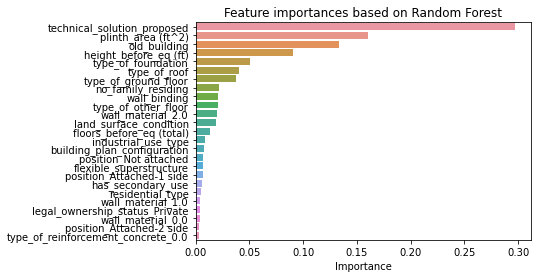

In [218]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Feature importances based on Random Forest")
plt.xlabel("Importance")
sns.barplot(x=importances[indices][:25], y=X_train.columns[indices][:25])

In [221]:
selected_features = X_train.columns[indices][:25]
X_train_imp = X_train[selected_features]
X_test_imp = X_test[selected_features]

params = {'n_estimators': 905, 'max_depth': 56, 'min_samples_split': 10,
          'min_samples_leaf': 1, 'max_features': 'sqrt'}

rf_imp = RandomForestClassifier(**params, random_state=69420)
rf_imp.fit(X_train_imp, y_train)

y_pred_imp = rf_imp.predict(X_test_imp)

print(f1_score(y_test, y_pred_imp, average="macro"))

0.6652642377878112


In [ ]:
import optuna

def rf_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 100),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
    }

    rf = RandomForestClassifier(**params, random_state=69420,  n_jobs=6)
    rf.fit(X_train_imp, y_train)
    y_pred = rf.predict(X_test_imp)

    return f1_score(y_test, y_pred, average="macro")

study = optuna.create_study(direction="maximize")
study.optimize(rf_objective, n_trials=100, timeout=600, n_jobs=6)

In [146]:
# tanpa feature engineering

print("Number of finished trials: ", len(study.trials))
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)

Number of finished trials:  59
Best params:  {'n_estimators': 905, 'max_depth': 56, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best value:  0.6677661772179329


In [226]:
params = {
    'n_estimators': 905, 'max_depth': 56, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'
}

rf_best = RandomForestClassifier(**params, random_state=69420)

In [ ]:
import xgboost as xgb

def xgb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 70),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    x = xgb.XGBClassifier(**params, random_state=69420, n_jobs=6)
    x.fit(X_train_imp, y_train)
    y_pred = x.predict(X_test_imp)

    return f1_score(y_test, y_pred, average="macro")


study = optuna.create_study(direction="maximize")
study.optimize(xgb_objective, n_trials=1000, timeout=15*60, n_jobs=6)

In [236]:
# xgboost

print("Number of finished trials: ", len(study.trials))
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)

Number of finished trials:  481
Best params:  {'n_estimators': 83, 'max_depth': 39, 'min_child_weight': 9, 'gamma': 5.745181368354108e-07, 'subsample': 0.869156089350386, 'colsample_bytree': 0.12869892991500909, 'reg_alpha': 0.0001783284598635175, 'reg_lambda': 6.194160977703726e-05}
Best value:  0.6685513105918949


In [267]:
params = {'n_estimators': 83, 'max_depth': 39, 'min_child_weight': 9, 'gamma': 5.745181368354108e-07, 'subsample': 0.869156089350386,
          'colsample_bytree': 0.12869892991500909, 'reg_alpha': 0.0001783284598635175, 'reg_lambda': 6.194160977703726e-05}

xgb_best = xgb.XGBClassifier(**params, random_state=69420, n_jobs=6)

xgb_best.fit(X_train_imp, y_train)
y_pred = xgb_best.predict(X_test_imp)

print(f1_score(y_test, y_pred, average="macro"))

0.6685513105918949


In [ ]:
import catboost as cb

def cb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 1, 16),
    }

    c = cb.CatBoostClassifier(**params, random_state=69420, verbose=False)
    c.fit(X_train_imp, y_train)
    y_pred = c.predict(X_test_imp)

    return f1_score(y_test, y_pred, average="macro")

study = optuna.create_study(direction="maximize")
study.optimize(cb_objective, n_trials=1000, timeout=15*60, n_jobs=6)

In [244]:
# catboost

print("Number of finished trials: ", len(study.trials))
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)


Number of finished trials:  52
Best params:  {'n_estimators': 156, 'max_depth': 7}
Best value:  0.6626768832044435


In [247]:
params = {'n_estimators': 156, 'max_depth': 7}

cb_best = cb.CatBoostClassifier(**params, random_state=69420, verbose=False)

In [248]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[('rf', rf_best), 
                ('xgb', xgb_best), 
                ('cb', cb_best)], 
    voting='soft', 
    n_jobs=6)

vc.fit(X_train_imp, y_train)
y_pred = vc.predict(X_test_imp)

print(f1_score(y_test, y_pred, average="macro"))

0.6635692868234485


In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[('rf', rf_best),
                ('xgb', xgb_best),
                ('cb', cb_best)],
    voting='hard',
    n_jobs=6)

vc.fit(X_train_imp, y_train)
y_pred = vc.predict(X_test_imp)

print(f1_score(y_test, y_pred, average="macro"))


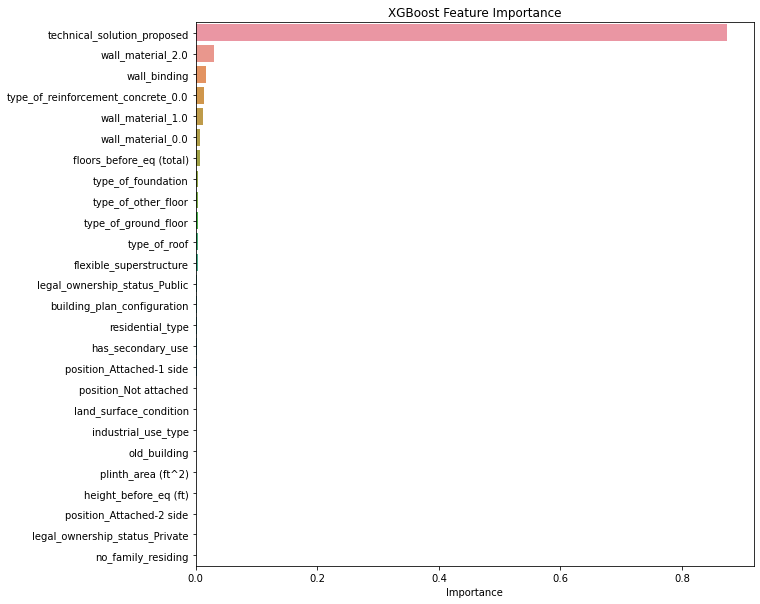

In [269]:
# plot xgboost feature importance

xgb_importance = pd.DataFrame(xgb_best.feature_importances_, index=X_train_imp.columns, columns=['importance'])
xgb_importance = xgb_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=xgb_importance.importance, y=xgb_importance.index)
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()

In [273]:
X["type_of_other_floor"].value_counts()

3.899777    30033
2.981242     7197
3.725698     3405
3.770145     3028
1.820031     1917
3.740611     1145
1.580089       76
Name: type_of_other_floor, dtype: int64

### Pembanding

In [ ]:
import optuna

def rf_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 100),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
    }

    rf = RandomForestClassifier(**params, random_state=69420,  n_jobs=6)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    return f1_score(y_test, y_pred, average="macro")

study = optuna.create_study(direction="maximize")
study.optimize(rf_objective, n_trials=1000, timeout=600, n_jobs=6)

In [252]:
# rf

print("Number of finished trials: ", len(study.trials))
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)

Number of finished trials:  62
Best params:  {'n_estimators': 827, 'max_depth': 93, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best value:  0.6651038306995625


In [253]:
params = {
    'n_estimators': 905, 'max_depth': 56, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'
}

rf_best_tanpa = RandomForestClassifier(**params, random_state=69420)

In [ ]:
import xgboost as xgb

def xgb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 70),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    x = xgb.XGBClassifier(**params, random_state=69420, n_jobs=6)
    x.fit(X_train, y_train)
    y_pred = x.predict(X_test)

    return f1_score(y_test, y_pred, average="macro")


study = optuna.create_study(direction="maximize")
study.optimize(xgb_objective, n_trials=1000, timeout=15*60, n_jobs=6)

In [255]:
# xgboost

print("Number of finished trials: ", len(study.trials))
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)

Number of finished trials:  147
Best params:  {'n_estimators': 597, 'max_depth': 67, 'min_child_weight': 5, 'gamma': 3.4882884104087076e-06, 'subsample': 0.7218766364251153, 'colsample_bytree': 0.07111566815822695, 'reg_alpha': 1.0176433519952923e-05, 'reg_lambda': 0.00029867435741877754}
Best value:  0.6663612614120259


In [256]:
params = {'n_estimators': 83, 'max_depth': 39, 'min_child_weight': 9, 'gamma': 5.745181368354108e-07, 'subsample': 0.869156089350386,
          'colsample_bytree': 0.12869892991500909, 'reg_alpha': 0.0001783284598635175, 'reg_lambda': 6.194160977703726e-05}

xgb_best_tanpa = xgb.XGBClassifier(**params, random_state=69420, n_jobs=6)

In [257]:
import catboost as cb

def cb_objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 1, 16),
    }

    c = cb.CatBoostClassifier(**params, random_state=69420, verbose=False)
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)

    return f1_score(y_test, y_pred, average="macro")

study = optuna.create_study(direction="maximize")
study.optimize(cb_objective, n_trials=1000, timeout=15*60, n_jobs=6)

[I 2023-04-11 11:09:02,067] A new study created in memory with name: no-name-c8fa0927-bd0e-4fa0-8f93-09fdbe2f2a45
Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2023-04-11 11:09:05,472] Trial 4 finished with value: 0.6527985801544315 and parameters: {'n_estimators': 80, 'max_depth': 4}. Best is trial 4 with value: 0.6527985801544315.
[I 2023-04-11 11:09:08,281] Trial 6 finished with value: 0.6441892310551692 and parameters: {'n_estimators': 77, 'max_depth': 2}. Best is trial 4 with value: 0.6527985801544315.
[I 2023-04-11 11:09:13,229] Trial 5 finished 

In [258]:
# catboost

print("Number of finished trials: ", len(study.trials))
print("Best params: ", study.best_params)
print("Best value: ", study.best_value)


Number of finished trials:  75
Best params:  {'n_estimators': 129, 'max_depth': 7}
Best value:  0.6624292723327566


In [260]:
params = {'n_estimators': 156, 'max_depth': 7}

cb_best_tanpa = cb.CatBoostClassifier(**params, random_state=69420, verbose=False)

In [261]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[('rf', rf_best_tanpa), 
                ('xgb', xgb_best_tanpa), 
                ('cb', cb_best_tanpa)], 
    voting='soft', 
    n_jobs=6)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print(f1_score(y_test, y_pred, average="macro"))

0.6621776505323937


In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[('rf', rf_best),
                ('xgb', xgb_best),
                ('cb', cb_best)],
    voting='hard',
    n_jobs=6)

vc.fit(X_train_imp, y_train)
y_pred = vc.predict(X_test_imp)

print(f1_score(y_test, y_pred, average="macro"))


### Submission

In [133]:
test = pd.read_csv("../../dataset/raw/test.csv")
test_clean = clean(test)

test_clean.head()


(46801, 20)
(46801, 36)


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,building_plan_configuration,...,legal_ownership_status_Private,legal_ownership_status_Public,type_of_reinforcement_concrete_0.0,type_of_reinforcement_concrete_1.0,type_of_reinforcement_concrete_2.0,type_of_reinforcement_concrete_3.0,wall_material_0.0,wall_material_1.0,wall_material_2.0,wall_material_3.0
0,-1.0,0.333333,-0.319149,-1.000000,1,3.921709,3.747907,3.847860,2.981242,3.664172,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.333333,0.000000,0.333333,2,3.924681,3.806631,3.837207,3.899777,3.664172,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-0.444444,0.106383,0.166667,2,3.924681,3.743924,3.741800,3.725698,3.664172,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.333333,-0.585106,-0.333333,2,3.924681,3.747907,3.837207,3.899777,3.664172,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.500000,-0.255319,-0.500000,2,3.921709,3.747907,3.837207,3.899777,3.664172,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [135]:
test_clean.to_csv("../../dataset/processed/test_encoded_v2.csv", index=False)

In [74]:
X_submit = test_clean.drop("id", axis=1)

y_sub = xgb_mini.predict(X_submit)
y_sub

array([4, 4, 4, ..., 0, 3, 4], dtype=int64)